<center><h1>Analyse du Tri Insertion</h1></center>

Dans ce document nous analyser les résultats de l'algorithme Tri insertion afin de déterminer les conditions dans lesquelles l'algorithme est le plus performant.

## Analyse théorique 

Avant d'analyser le résultat de nos expérimentations sur cet algorithme, nous allons étudier la complexité du Tri insertion.

Algorithme TriInsertion :

    fonction triInsertion(tableau T, taille N):
        Pour i allant de 1 à N-1 :
            x = T[i]
            j = i
            Tant que j > 0 et T[j-1] > x :
                T[j] =  T[j-1]
                j = j-1
            T[j] = x

La fonction triInsertion effectue deux boucles imbriquées.

La première boucle est une boucle qui va éxécuter N-1 tours.

La seconde boucle est une boucle "tant que" elle admet donc un meilleur et un pire cas.

Dans le meilleur cas le tableau est deja trie, la boucle effectue alors une opération par tour.
Dans le pire des cas, le tableau étant dans l'ordre inverse la boucle effectuera i opérations au ième tour de boucle.

Ainsi, dans le meilleur des cas l'algorithme a une complexité de l'ordre de O(n) et dans le pire des cas elle est de O(n²).



## Analyse des résultats de Tri Insertion

Dans cette partie nous allons analyser l'efficacité constatée de l'algorithme Tri Insertion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import odr
import time

### Tri de int

On importe dans la cellule suivante les données et on nomme les colonnes.

In [2]:
data = pd.read_csv('result_data/InsertionSort.csv',sep=',')# On récupère les données correspondantes
print("Fichier lu")

data.columns = ["NumberElements","NombreEchangeRd",
                     "NombreComparaisonRd","TempsMSRd","NombreEchange1_2",
                     "NombreComparaison1_2","TempsMS1_2","NombreEchangeStart25",
                     "NombreComparaisonStart25","TempsMSStart25",
                     "NombreEchangeStart50","NombreComparaisonStart50",
                     "TempsMSStart50","NombreEchangeEnd25",
                     "NombreComparaisonEnd25","TempsMSEnd25",
                     "NombreEchangeEnd50","NombreComparaisonEnd50",
                     "TempsMSEnd50","NombreEchangeSorted",
                     "NombreComparaisonSorted","TempsMSSorted"]

Fichier lu


#### En particulier

On va comparer les temps d'exécution, le nombre de comparaisons, d'échanges, pour un grand nombre n afin de voir s'il y a un cas de désordre désavantageux.

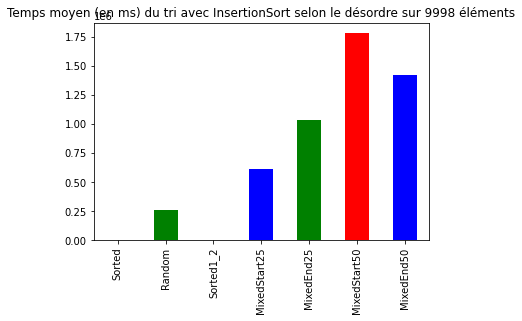

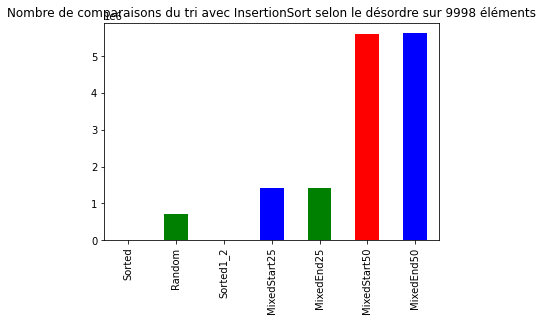

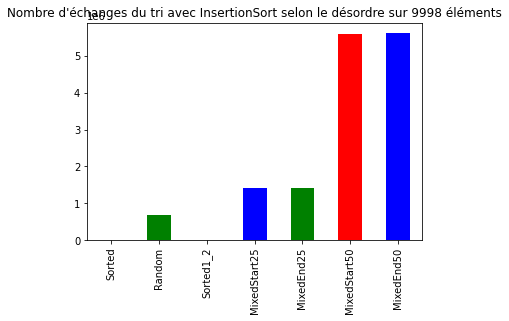

In [3]:
NomAlgorithme = "InsertionSort"
n = 9998
vitesseDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'TempsMSSorted'],
    'Random' : data.loc[:,'TempsMSRd'],
    'Sorted1_2': data.loc[:,'TempsMS1_2'],
    'MixedStart25': data.loc[:,'TempsMSStart25'],
    'MixedEnd25': data.loc[:,'TempsMSEnd25'],
    'MixedStart50': data.loc[:,'TempsMSStart50'],
    'MixedEnd50': data.loc[:,'TempsMSEnd50']
})

echangesDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreEchangeSorted'],
    'Random' : data.loc[:,'NombreEchangeRd'],
    'Sorted1_2': data.loc[:,'NombreEchange1_2'],
    'MixedStart25': data.loc[:,'NombreEchangeStart25'],
    'MixedEnd25': data.loc[:,'NombreEchangeEnd25'],
    'MixedStart50': data.loc[:,'NombreEchangeStart50'],
    'MixedEnd50': data.loc[:,'NombreEchangeEnd50']
})

comparaisonsDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreComparaisonSorted'],
    'Random' : data.loc[:,'NombreComparaisonRd'],
    'Sorted1_2': data.loc[:,'NombreComparaison1_2'],
    'MixedStart25': data.loc[:,'NombreComparaisonStart25'],
    'MixedEnd25': data.loc[:,'NombreComparaisonEnd25'],
    'MixedStart50': data.loc[:,'NombreComparaisonStart50'],
    'MixedEnd50': data.loc[:,'NombreComparaisonEnd50']
})

finalCmpDF = pd.DataFrame({
    'Comparaisons': comparaisonsDF.loc[n,vitesseDF.columns != 'Elements']
})
finalTimeDF = pd.DataFrame({
    'Temps': vitesseDF.loc[n,vitesseDF.columns != 'Elements']
})
finalExDF = pd.DataFrame({
    'Echanges': echangesDF.loc[n,echangesDF.columns != 'Elements']
})

plt.figure()

finalTimeDF['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Temps moyen (en ms) du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalCmpDF['Comparaisons'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre de comparaisons du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalExDF['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

Ici, on observe qu'en moyenne l'algorithme GnomeSort n'est pas plus efficace si le désordre et au début ou à la fin dans la mesure où le nombre d'échanges et de comparaisons pour End25 et Start25 sont similaires.
De plus l'algorithme est très efficace lorsque le tableau est mélangé une fois sur deux, puisqu'il n'a qu'à faire un échange par élément désordonné. Contrairement à la situation où tout le tableau est désordonné.

#### Comportement par rapport aux quantités de données

Dans cette partie, nous allons observer comment le temps d'exécution évolue si l'on augmente la taille de l'échantillon à trier toujours selon le désordre.

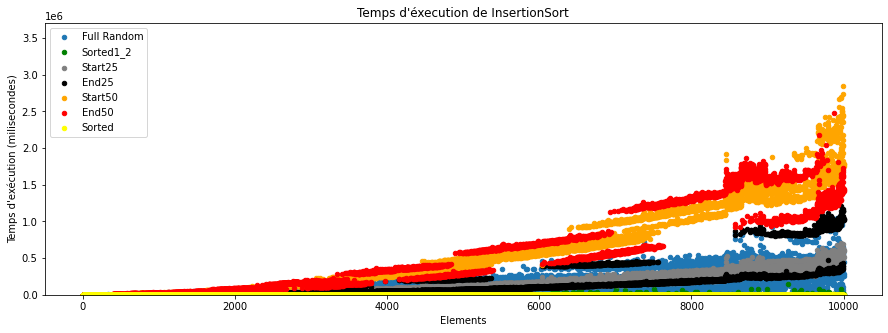

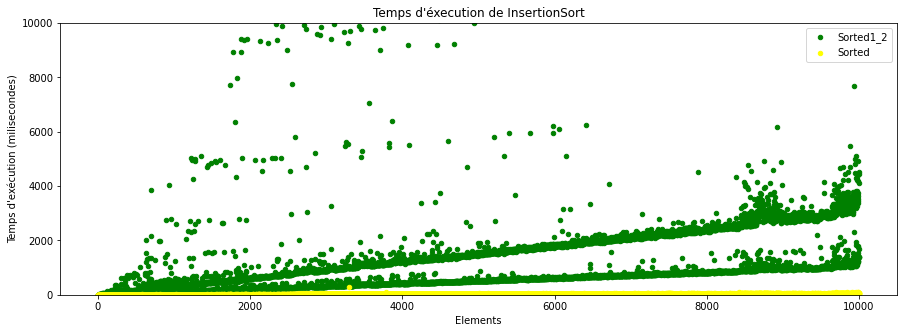

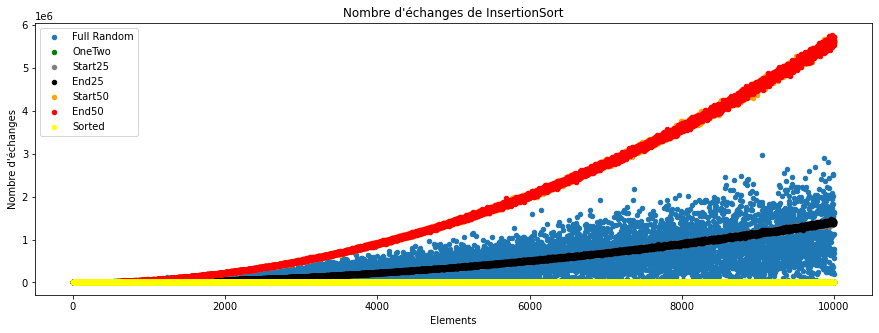

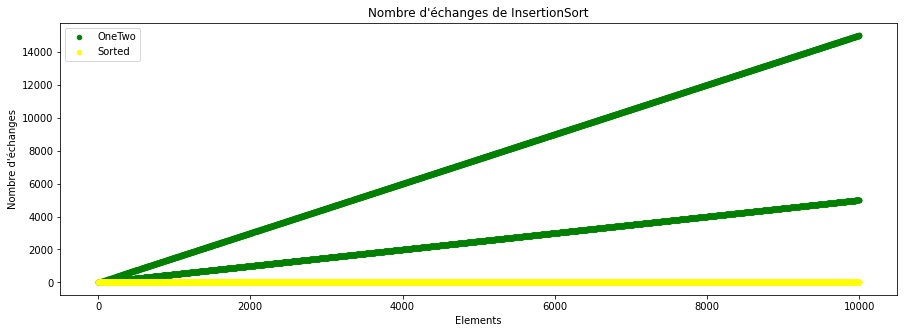

In [4]:
# solution trouvée sur https://stackoverflow.com/questions/13872533/how-to-plot-different-groups-of-data-from-a-dataframe-into-a-single-figure

fig = vitesseDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
ax = plt.gca()
ax.set_ylim([0, 3705291])
plt.show()


fig = vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
ax = plt.gca()
ax.set_ylim([0, 10000])
plt.show()

fig = echangesDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

On constate à l'aide de ce nuage de points que lorsque la quantité de données est très grande le InsertionSort prend un temps n² où n est la taille de l'échantillon (ici en rouge et orange pour la moitié du tableau désordonné).

Néanmoins, quand le tableau est mélangé au hasard on obtient un léger meilleur résultat, puisque tous les éléments ne sont pas forcément désordonnés. Mais le temps reste de l'ordre de n² car les échanges son coûteux et très récurrents dans cette algorithme quand la moitié du tableau est désordonné pour un tableau n on obtient un nombre n² d'échanges ce qui explique la lenteur de l'algorithme.

Cependant, on remarque que lorsque les éléments sont triés une fois sur deux (ici en vert) le temps d'exécution croît de manière quasi-linéaire malgré la complexité en O(N²) de l'algorithme au niveau des comparaisons.

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html
# L'idée est ici de se représenter sous forme de fonction l'écart approximatif
# entre chacun de nos résultats pour une même taille de donnée

poly_model = odr.polynomial(2)

dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du temps d'exécution du InsertionSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* 0.0032928413874312892  + n² * 1.2857948099324422e-07

Fonction d'approximation du temps d'exécution du InsertionSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -9.38989967383338  + n² * 0.005902527532069883

Fonction d'approximation du temps d'exécution du InsertionSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -9.910189734949457  + n² * 0.018945177612435908



Ici, on aperçoit que lorsque le tableau est déjà trié le temps est assez linéaire, tandis que, lorsque le nombre d'éléments désordonnés augmentent on tend à augmenter le facteur de n².

Nous allons voir si on constate ce changement au niveau du nombre d'échanges.


In [6]:
dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du nombre d'échanges du InsertionSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* -2.643963534628842e-166  + n² * 3.424169316957562e-170

Fonction d'approximation du nombre d'échanges du InsertionSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -26.455433976485647  + n² * 0.018591513783746783

Fonction d'approximation du nombre d'échanges du InsertionSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -0.1577009967037506  + n² * 0.05649859928797317



Dans ces approximations, on retrouve d'abord que le nombre d'échanges pour le tableau trié est de 0 environ.
Et on remarque qu'avec notre échantillon de données l'augmentation de l'importance du terme en n² est due à l'augmentation présente pour le nombre d'échanges.

## Bilan

Après avoir analysé l'algorithme InsertionSort dans chacune des situations que nous avons expérimentées, nous proposons d'observer un diagramme en boîte nous permettant de déterminer quel est le pire cas d'utilisation et le meilleur cas d'utilisation de l'algorithme.

                Temps
Sorted             47
Random         258952
Sorted1_2        1696
MixedStart25   613480
MixedEnd25    1030952
MixedStart50  1781575
MixedEnd50    1419618


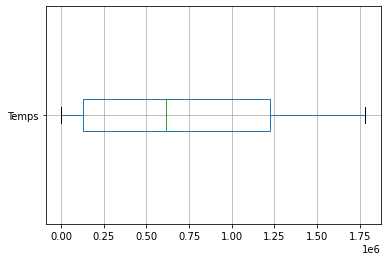

La meilleure des situations pour InsertionSort est lorsqu'il tri un tableau mélangé avec l'algorithme Sorted de mélange.
La pire des situations pour InsertionSort est lorsqu'il tri le tableau mélangé avec l'algorithme MixedStart50 de mélange.
              Echanges
Sorted               0
Random          695463
Sorted1_2         5000
MixedStart25   1419973
MixedEnd25     1407276
MixedStart50   5577284
MixedEnd50     5615083


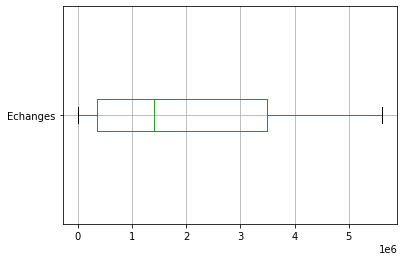

              Comparaisons
Sorted                9999
Random              705462
Sorted1_2            14999
MixedStart25       1429972
MixedEnd25         1417275
MixedStart50       5587283
MixedEnd50         5625082


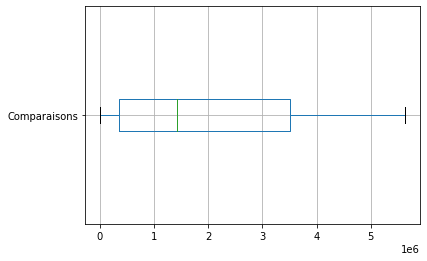

In [7]:
def findMaxRowColumnName(df):
    maximumRowsName = df.idxmax()
    return maximumRowsName

def findMinRowColumnName(df):
    minimumRowsName = df.idxmin()
    return minimumRowsName
minimum = findMinRowColumnName(finalTimeDF)
maximum = findMaxRowColumnName(finalTimeDF)

finalTimeDF.boxplot(vert = False)
print(finalTimeDF)
plt.show()

print("La meilleure des situations pour " + NomAlgorithme +
      " est lorsqu'il tri un tableau mélangé avec l'algorithme", minimum[0],"de mélange.")
print("La pire des situations pour " + NomAlgorithme + " est lorsqu'il tri le tableau mélangé avec l'algorithme", maximum[0],"de mélange.")

finalExDF.boxplot(vert = False)
print(finalExDF)
plt.show()
finalCmpDF.boxplot(vert = False)
print(finalCmpDF)

Pour conclure, nous pouvons dire que l'algorithme InsertionSort est au maximum de son efficacité lorsque le tableau a un désordre de type :  un élément sur deux triés.

Cependant, l'algorithme prend un temps de l'ordre de N² dans les autres cas, peu importe où est le désordre, le temps est le même que ce soit au début ou à la fin.

La meilleure situation pour utiliser le InsertionSort est lorsque l'échantillon de données est quasiment trié, la pire des situations est lorsque le tableau est entièrement désordonné voire même un ordre inversé.